# 4th Year Project: Smoothing Filters Testground
`
Last Modified: 26th January 2020
Author: Ken Yew Piong, Chin Yang Tan
UCL ID: 16004444
`
```python
# DEVELOPER NOTES
prosuplvl0-forearm
22.4,28.56,49.7,57.65,78.5,88.9

prosuplvl0-wrist
22.5, 31.5, 52, 61.2, 81, 91.4

ttap-lvl0-wrist
24, 36, 56.5, 67.5, 88, 99
```

---
## Library Import

In [1]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft
from scipy import signal
from util import *

%matplotlib inline
mpld3.enable_notebook()

importing Jupyter notebook from util.ipynb


---
## 1.0 Global Parameters for Plot Customisation

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 16,
          'legend.loc': 'best',
          'figure.figsize': (12, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 16,
         'ytick.labelsize': 16}

# Update plot customisation parameters
pylab.rcParams.update(params)

---
## 2.0 Data Import

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\User\Desktop\4th_year_project\Parkinson-Disease-Repository\Testground\Test 3 - Chin Yang Playground\Ken_Test1


In [12]:
working_path = get_folder_path('leag-heel')
print(working_path)
os.chdir(working_path)
file = 'leag-lvl0-heel_S2_2019-12-18T12.10.04.840_C49948A1895C_Accelerometer_1.4.5.csv'
df = read_csv_file(file)
os.chdir('..')

C:\Users\User\Desktop\4th_year_project\Parkinson-Disease-Repository\Testground\Test 3 - Chin Yang Playground\Ken_Test1\Patient001-2019-12-05\leag-heel


--- 
## 3.0 Testground
### 3.1 Raw Data Overview

In [13]:
df

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1576671004840,2019-12-18T12:10:04.840,0.000,0.218,0.965,0.030
1,1576671004860,2019-12-18T12:10:04.860,0.020,0.221,0.973,0.030
2,1576671004881,2019-12-18T12:10:04.881,0.041,0.222,0.970,0.029
3,1576671004900,2019-12-18T12:10:04.900,0.060,0.219,0.970,0.032
4,1576671004920,2019-12-18T12:10:04.920,0.080,0.223,0.968,0.033
...,...,...,...,...,...,...
2724,1576671058977,2019-12-18T12:10:58.977,54.137,0.294,0.947,0.032
2725,1576671058996,2019-12-18T12:10:58.996,54.156,0.297,0.948,0.029
2726,1576671059017,2019-12-18T12:10:59.017,54.177,0.296,0.949,0.029
2727,1576671059037,2019-12-18T12:10:59.037,54.197,0.294,0.950,0.029


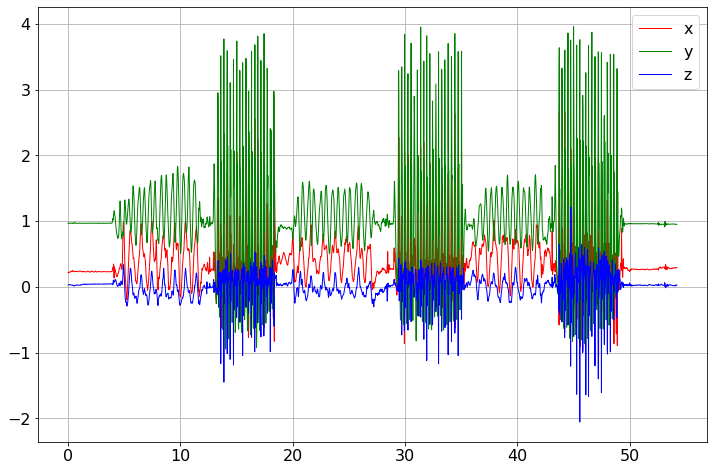

In [14]:
plot_time_3_axes(df)

---
### 3.2 Truncated Data Inspection

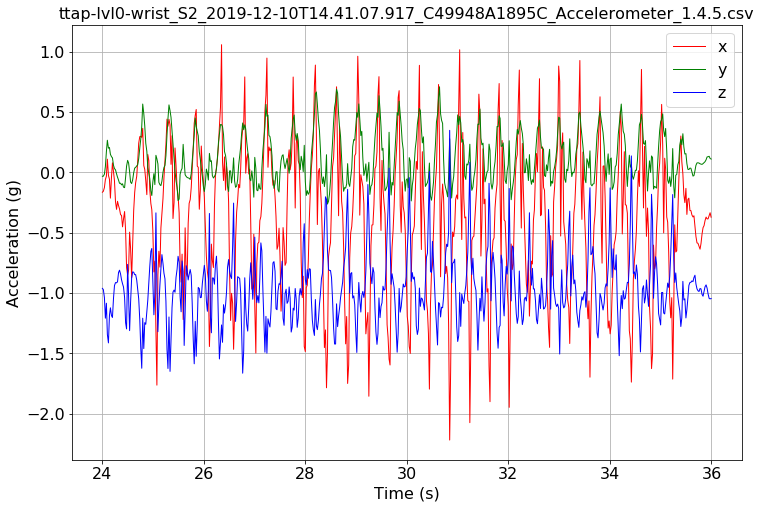

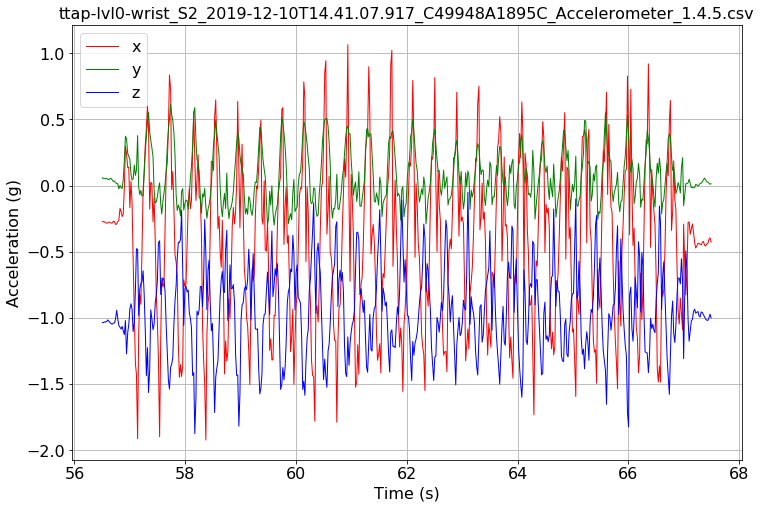

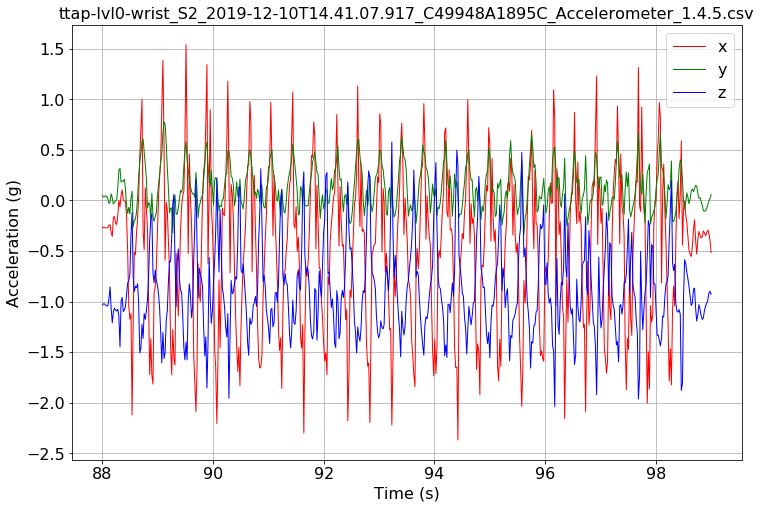

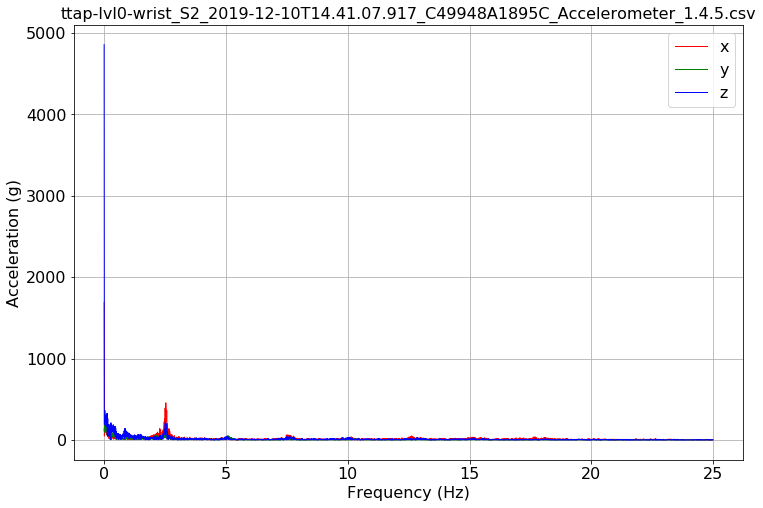

In [16]:
# ==============================================
# Truncated Data Analysis
# ==============================================
# working_path = get_folder_path('prosup-wrist')
# file = 'prosup-lvl0-wrist_S2_2019-12-10T15.13.45.631_C49948A1895C_Gyroscope_1.4.5.csv' # 22.5, 31.5, 52, 61.2, 81, 91.4
working_path = get_folder_path('ttap-wrist')
file = 'ttap-lvl0-wrist_S2_2019-12-10T14.41.07.917_C49948A1895C_Accelerometer_1.4.5.csv'
os.chdir(working_path)

# Data pre-processing
df = read_csv_file(os.path.join(working_path,file))
os.chdir('..')
# df_1, df_2, df_3 = truncate_dataframe(working_path, file, 22.5, 31.5, 52, 61.2, 81, 91.4)
df_1, df_2, df_3 = truncate_dataframe(working_path, file, 24, 36, 56.5, 67.5, 88, 99)

plot_time_3_axes(df_1, t = file)
plot_time_3_axes(df_2, t = file)
plot_time_3_axes(df_3, t = file)

fs = 50
# plot_frequency(df_1, fs, t = file)
# plot_frequency(df_2, fs, t = file)
plot_frequency(df, fs, t = file)

In [ ]:
df_3

---
### 3.3 Low Pass Filters

In [ ]:
# ==============================================
# Input Parameters
# ==============================================
f_size = 155 # Number of Filter Taps
fs = 50 # Sampling Frequency
cutoff = 10 # Desired Cut-off Frequency (Hz)
window = 'hamming'

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
lpf_data = lowpass_filter(df_3, f_size, cutoff, fs, window, file)
# median_data = median_filter_df(df_3, f_size, file)

# ==============================================
# Filter Plots
# ==============================================
plot_time_3_axes(lpf_data, t = "LPF: " + file)
plot_frequency(lpf_data, fs, t = "LPF: " + file)
# plot_time_3_axes(median_data, t = "Median Filter: " + file)
# plot_frequency(median_data, fs, t = "Median Filter: " + file)

In [ ]:
lpf_data

In [ ]:
df_3

---
### 3.4 Bandpass Filters

In [ ]:
# ==============================================
# Input Parameters
# ==============================================
# Sample rate and desired cutoff frequencies (in Hz).
fs = 50
lowcut = 2
highcut = 3
order = 5

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
bpf_data = butter_bandpass_filter(df_3, lowcut, highcut, fs, order, file)

# ==============================================
# Filter Plots
# ==============================================
plot_time_3_axes(bpf_data, t = "BPF: " + file)
plot_frequency(bpf_data, fs, t = "BPF: " + file)

In [ ]:
bpf_data

---
## 4.0 Archive Code

In [ ]:
# ==============================================
# Filter Functions Archive
# ==============================================
def median_filter(df, f_size):
    select_cols=[3, 4, 5]
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    for idx, col in enumerate(select_cols):
        f_data[:,idx]=signal.medfilt(df.iloc[:,col], f_size)
    return f_data

def freq_filter(df, f_size, cutoff):
    select_cols=[3, 4, 5]
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for idx, col in enumerate(select_cols): 
        f_data[:,idx]=signal.convolve(df.iloc[:,col], lpf, mode='same')
    return f_data

def freq_filter_recursive(df, f_size, cutoff):
    lgth, num_signal=df.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for i in range(num_signal):
        f_data[:,i]=signal.convolve(df[:,i], lpf, mode='same')
    return f_data

def plot_frequency_recursive(df, fs, t = ''):
    # Create mapping lists
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    lgth, num_signal=df.shape
    fqy = np.zeros([lgth, num_signal])
    
    # Perform FFT on data and store in matrix
    for i in range(num_signal): 
        fqy[:,i] = np.abs(fft(df[:, i]))

    index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if 'Accelerometer' in t:
        ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = t) # xlim = [0, fs/2] 
    elif 'Gyroscope' in t:
        ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (deg/s)', title = t) # xlim = [0, fs/2] 
    ax.grid(b=True, which='both')
    
    # Plot 
    for i in range(3):
        ax.plot(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])

    ax.legend()

In [ ]:
# # ======================================================================
# # Edit the input variable below to change to the folder path of interest
# # ======================================================================
# working_path = get_folder_path('tota-calf&heel')

# # Data Overview
# display(working_path)
# df_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)
# # display(df_tabulated_stats)

# # File and directory management
# os.chdir(working_path)
# directory = os.listdir()

# for file in directory:
#     display(file)
#     df = read_csv_file(file)
#     if df is None:
#         continue

#     # ==============================================
#     # Data Pre-processing
#     # ==============================================
#     df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
#     display(df_raw_stats)
    
# #     df_processed = process_dataframe(df, file, window, max_window) 
# #     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
# #     display(df_processed_stats)
    
#     # ==============================================
#     # Data Visualisation
#     # ==============================================
#     # Update plot customisation parameters
#     pylab.rcParams.update(params)
    
#     # Uncomment sections below to enable plots of interest
#     plot_time_3_axes(df, t = file)
# #     plot_magnitude_frequency(df_processed, t = file)
# #     plot_frequency(df, fs, t = file)

# os.chdir('..')